In [1]:
import sqlite3
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
path = r'C:\Users\vatti\OneDrive\Documents\Data\mimic.db'

In [3]:
conn = sqlite3.connect(path)

In [4]:
cursorObj = conn.cursor()
allTables = cursorObj.execute ('SELECT name from sqlite_master where type= "table"')
allTables.fetchall()

[('admissions',),
 ('callout',),
 ('caregivers',),
 ('chartevents',),
 ('cptevents',),
 ('d_cpt',),
 ('d_icd_diagnoses',),
 ('d_icd_procedures',),
 ('d_items',),
 ('diagnoses_icd',),
 ('drgcodes',),
 ('icustays',),
 ('inputevents_cv',),
 ('inputevents_mv',),
 ('labevents',),
 ('microbiologyevents',),
 ('noteevents',),
 ('outputevents',),
 ('patients',),
 ('prescriptions',),
 ('procedureevents_mv',),
 ('procedures_icd',),
 ('services',),
 ('transfers',),
 ('d_labitems',),
 ('datetimeevents',)]

In [5]:
diag = pd.read_sql('select * from diagnoses_icd limit 10', conn)
diag

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1,40301
1,1298,109,172335,2,486
2,1299,109,172335,3,58281
3,1300,109,172335,4,5855
4,1301,109,172335,5,4254
5,1302,109,172335,6,2762
6,1303,109,172335,7,7100
7,1304,109,172335,8,2767
8,1305,109,172335,9,7243
9,1306,109,172335,10,45829


In [61]:
le = pd.read_sql('select * from labevents limit 10', conn)
le

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,,50820,2101-10-12 16:07:00,7.39,7.39,units,
1,282,3,,50800,2101-10-12 18:17:00,ART,,,
2,283,3,,50802,2101-10-12 18:17:00,-1,-1,mEq/L,
3,284,3,,50804,2101-10-12 18:17:00,22,22,mEq/L,
4,285,3,,50808,2101-10-12 18:17:00,0.93,.93,mmol/L,abnormal
5,286,3,,50812,2101-10-12 18:17:00,NOT INTUBATED,,,
6,287,3,,50813,2101-10-12 18:17:00,1.8,1.8,mmol/L,
7,288,3,,50818,2101-10-12 18:17:00,33,33,mm Hg,
8,289,3,,50820,2101-10-12 18:17:00,7.42,7.42,units,
9,290,3,,50821,2101-10-12 18:17:00,80,80,mm Hg,


In [6]:
labs = pd.read_sql('select * from labevents limit 10', conn)
labs

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,,50820,2101-10-12 16:07:00,7.39,7.39,units,
1,282,3,,50800,2101-10-12 18:17:00,ART,,,
2,283,3,,50802,2101-10-12 18:17:00,-1,-1,mEq/L,
3,284,3,,50804,2101-10-12 18:17:00,22,22,mEq/L,
4,285,3,,50808,2101-10-12 18:17:00,0.93,.93,mmol/L,abnormal
5,286,3,,50812,2101-10-12 18:17:00,NOT INTUBATED,,,
6,287,3,,50813,2101-10-12 18:17:00,1.8,1.8,mmol/L,
7,288,3,,50818,2101-10-12 18:17:00,33,33,mm Hg,
8,289,3,,50820,2101-10-12 18:17:00,7.42,7.42,units,
9,290,3,,50821,2101-10-12 18:17:00,80,80,mm Hg,


In [7]:
admissions = pd.read_sql('select *, (julianday(date(admittime))-julianday(date(dob)))/365.25 as age from admissions, patients where admissions.subject_id = patients.subject_id and (julianday(date(admittime))-julianday(date(dob)))/365.25 > 24 and (julianday(date(admittime))-julianday(date(dob)))/365.25 < 65',conn)

In [8]:
admissions.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID', 'SUBJECT_ID',
       'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'age'],
      dtype='object')

In [35]:
import time

admissions['los'] = admissions.apply(lambda r: (time.mktime(time.strptime(r['DISCHTIME'],'%Y-%m-%d %H:%M:%S')) - 
                 time.mktime(time.strptime(r['ADMITTIME'],'%Y-%m-%d %H:%M:%S')))/3600.0, axis=1)

In [36]:
emergency = admissions[admissions['ADMISSION_TYPE'] == 'EMERGENCY']

In [37]:
emergency

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,age,los,los_hrs
0,326,252,190159,2133-03-31 04:24:00,2133-04-23 15:00:00,,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,252,M,2078-03-06 00:00:00,,,,0,55.066393,562.600000,562.600000
1,327,252,193470,2133-08-15 04:23:00,2133-08-19 17:30:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,252,M,2078-03-06 00:00:00,,,,0,55.441478,109.116667,109.116667
3,339,263,120845,2160-01-09 19:30:00,2160-01-21 16:15:00,,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,263,M,2104-06-18 00:00:00,2168-06-13 00:00:00,2168-06-13 00:00:00,,1,55.559206,284.750000,284.750000
5,343,267,163714,2156-06-04 05:08:00,2156-06-15 13:54:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,267,F,2131-09-05 00:00:00,,,,0,24.747433,272.766667,272.766667
6,345,269,106296,2170-11-05 11:04:00,2170-11-27 18:00:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,...,269,M,2130-09-30 00:00:00,,,,0,40.098563,534.933333,534.933333
8,818,665,126226,2114-07-05 15:52:00,2114-07-08 03:00:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Government,...,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,,1,62.121834,59.133333,59.133333
9,821,666,182220,2129-03-26 19:21:00,2129-03-28 11:36:00,,EMERGENCY,EMERGENCY ROOM ADMIT,LEFT AGAINST MEDICAL ADVI,Private,...,666,F,2069-08-26 00:00:00,2139-11-20 00:00:00,,2139-11-20 00:00:00,1,59.578371,40.250000,40.250000
10,824,669,109338,2182-07-31 04:27:00,2182-07-31 06:45:00,2182-07-31 06:45:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,669,M,2121-10-20 00:00:00,2182-07-31 00:00:00,2182-07-31 00:00:00,2182-07-31 00:00:00,1,60.777550,2.300000,2.300000
11,826,671,126769,2195-12-31 04:44:00,2196-01-11 17:45:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,671,M,2148-03-27 00:00:00,,,,0,47.761807,277.016667,277.016667
12,827,672,119707,2199-04-23 10:43:00,2199-04-25 15:00:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,672,M,2152-10-21 00:00:00,,,,0,46.502396,52.283333,52.283333


In [298]:
window_back = 0
window_forward = 24 
shift = 1

window_size = window_back + window_forward
window_size

24

In [38]:
pts = emergency.iloc[:,1].unique()

In [39]:
from sklearn.model_selection import train_test_split

trp, tsp = train_test_split(pts, train_size=0.8)
tr = emergency[emergency.iloc[:,1].isin(trp)]
ts = emergency[emergency.iloc[:,1].isin(tsp)]

In [40]:
tr_sel = tr[tr['los'] >= window_back]
ts_sel=ts[ts['los']>=window_back]

In [32]:
tr_sel.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,age,los,los_hrs
3,339,263,120845,2160-01-09 19:30:00,2160-01-21 16:15:00,,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,263,M,2104-06-18 00:00:00,2168-06-13 00:00:00,2168-06-13 00:00:00,,1,55.559206,284.750000,284.750000
5,343,267,163714,2156-06-04 05:08:00,2156-06-15 13:54:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,267,F,2131-09-05 00:00:00,,,,0,24.747433,272.766667,272.766667
8,818,665,126226,2114-07-05 15:52:00,2114-07-08 03:00:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Government,...,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,,1,62.121834,59.133333,59.133333
9,821,666,182220,2129-03-26 19:21:00,2129-03-28 11:36:00,,EMERGENCY,EMERGENCY ROOM ADMIT,LEFT AGAINST MEDICAL ADVI,Private,...,666,F,2069-08-26 00:00:00,2139-11-20 00:00:00,,2139-11-20 00:00:00,1,59.578371,40.250000,40.250000
10,824,669,109338,2182-07-31 04:27:00,2182-07-31 06:45:00,2182-07-31 06:45:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,669,M,2121-10-20 00:00:00,2182-07-31 00:00:00,2182-07-31 00:00:00,2182-07-31 00:00:00,1,60.777550,2.300000,2.300000


In [33]:
tr_sel.shape

(15224, 30)

In [34]:
ts_sel.shape

(3849, 30)

In [42]:
dt_tr = pd.DataFrame()

for t in range(window_back, int(pt['los']), shift):
    labs = pd.read_sql("select * from labevents where hadm_id = \"" + pt[2] + 
                       "\" and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                       "\"))*24.0 >= " + str(t - window_back) +
                       " and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                       "\"))*24.0 < " + str(pt['los']), conn)
    if len(labs.index) > 0:
        labs=labs.replace("",np.nan)
        labs['vn'] = labs.apply(lambda r: float(r['VALUENUM']),axis=1)
        gr = labs.groupby('ITEMID')
        dt_tr=pd.concat([dt_tr, pd.DataFrame(gr['vn'].mean()).T], ignore_index = True)

dts = []
for i in tr_sel.index[:1000]:
    pt = tr_sel.iloc[i]  
    for t in range(window_back, int(pt['los']), shift):
        labs = pd.read_sql("select * from labevents where hadm_id = \"" + pt[2] + 
                           "\" and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                           "\"))*24.0 >= " + str( t - window_back) +
                           " and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                           "\"))*24.0 < " + str( pt['los']), conn)
        if len(labs.index) > 0:
            flag = 0
            if ((pt['HOSPITAL_EXPIRE_FLAG'] == '1') 
                # check if died on day of discharge
                and ((time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')).tm_year == (time.strptime(pt['DISCHTIME'],'%Y-%m-%d %H:%M:%S')).tm_year)
                and ((time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')).tm_mon == (time.strptime(pt['DISCHTIME'],'%Y-%m-%d %H:%M:%S')).tm_mon)
                and ((time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')).tm_mday == (time.strptime(pt['DISCHTIME'],'%Y-%m-%d %H:%M:%S')).tm_mday)
                # check if within the window
                and (time.mktime(time.strptime(pt['ADMITTIME'],'%Y-%m-%d %H:%M:%S')) + (t + window_forward) * 3600 >
                     time.mktime(time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')) )
               ):
                flag = 1

            labs=labs.replace("",np.nan)
            labs['vn'] = labs.apply(lambda r: float(r['VALUENUM']),axis=1)
            gr = labs.groupby('ITEMID')
            d = pd.DataFrame(gr['vn'].mean()).T
            d['class'] = flag   
            d['subject_id'] = pt.iloc[1]
            d['hadm_id'] = pt.iloc[2]
            d['t'] = t
            dts.append(d)
print('concatenating data')
dt_tr = pd.concat(dts, ignore_index=True) 
del dts

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


concatenating data


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [43]:
from sklearn.impute import SimpleImputer
# Balance out the data by imputation

imp = SimpleImputer()
dt_tr=dt_tr.dropna(axis=1, how='all')
imp.fit(dt_tr)
dt_tr_imp=pd.DataFrame(imp.transform(dt_tr),columns=list(dt_tr.columns))

In [44]:
dt_test = pd.DataFrame()
for t in range(window_back, int(pt['los']), shift):
    labs = pd.read_sql("select * from labevents where hadm_id = \"" + pt[2] + 
                       "\" and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                       "\"))*24.0 >= " + str(t - window_back) +
                       " and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                       "\"))*24.0 < " + str(pt['los']), conn)
    if len(labs.index) > 0:
        labs=labs.replace("",np.nan)
        labs['vn'] = labs.apply(lambda r: float(r['VALUENUM']),axis=1)
        gr = labs.groupby('ITEMID')
        dt_test=pd.concat([dt_test, pd.DataFrame(gr['vn'].mean()).T], ignore_index = True)

dts = []
for i in ts_sel.index[:1000:
    pt = ts_sel.iloc[i]  
    for t in range(window_back, int(pt['los']), shift):
        labs = pd.read_sql("select * from labevents where hadm_id = \"" + pt[2] + 
                           "\" and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                           "\"))*24.0 >= " + str( t - window_back) +
                           " and (julianday(CHARTTIME) - julianday(\"" + pt[3] +
                           "\"))*24.0 < " + str(pt['los']), conn)
        if len(labs.index) > 0:
            flag = 0
            if ((pt['HOSPITAL_EXPIRE_FLAG'] == '1') 
                and ((time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')).tm_year == (time.strptime(pt['DISCHTIME'],'%Y-%m-%d %H:%M:%S')).tm_year)
                and ((time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')).tm_mon == (time.strptime(pt['DISCHTIME'],'%Y-%m-%d %H:%M:%S')).tm_mon)
                and ((time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')).tm_mday == (time.strptime(pt['DISCHTIME'],'%Y-%m-%d %H:%M:%S')).tm_mday)
                and (time.mktime(time.strptime(pt['ADMITTIME'],'%Y-%m-%d %H:%M:%S')) + (t + window_forward) * 3600 >
                     time.mktime(time.strptime(pt['DOD_HOSP'],'%Y-%m-%d %H:%M:%S')) )
               ):
                flag = 1

            labs=labs.replace("",np.nan)
            labs['vn'] = labs.apply(lambda r: float(r['VALUENUM']),axis=1)
            gr = labs.groupby('ITEMID')
            #print(pd.DataFrame(gr['vn'].mean()).T)
            d = pd.DataFrame(gr['vn'].mean()).T
            d['class'] = flag
            d['subject_id'] = pt.iloc[1]
            d['hadm_id'] = pt.iloc[2]
            d['t'] = t
            dts.append(d)
print('concatenating data')
dt_test = pd.concat(dts, ignore_index=True) 
del dts

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


concatenating data


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [45]:
dt_map = pd.DataFrame()

for c in list(dt_tr_imp.columns):
    if c in list(dt_test.columns):
        dt_map[c] = dt_test[c]
    else:
        dt_map[c] = np.nan

dt_test_imp=pd.DataFrame(imp.transform(dt_map),columns=list(dt_map.columns))

cls = list(dt_tr_imp.columns)

cls.remove('class')
cls.remove('subject_id')
cls.remove('hadm_id')
cls.remove('t')

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(dt_tr_imp[cls],dt_tr_imp['class'])
probs_lr = lr.predict_proba(dt_test_imp[cls])

from sklearn.metrics import roc_auc_score

print( "LR AUC: ", roc_auc_score(dt_test_imp['class'], probs_lr[:,1]))

LR AUC:  0.7745701606875934


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Logistic Regression

0.7745701606875934

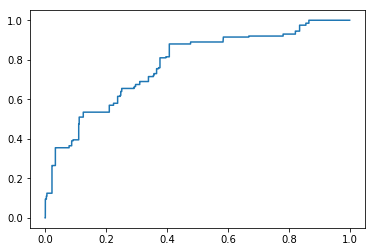

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(dt_test_imp['class'], probs_lr[:,1])
plt.plot(fpr,tpr)
auc(fpr,tpr)

In [63]:
len(dt_test.columns)

337

In [58]:
dt_test['subject_id'].unique() #74

array(['734', '805', '113', '127', '285', '353', '356', '372', '449',
       '458', '518', '551', '559', '565', '1704', '1372', '1380', '1433',
       '945', '247', '2387', '2394', '3563', '3595', '3647', '3306',
       '3386', '1570', '1002', '1946', '2570', '2258', '1709', '4267',
       '4104', '4405', '4448', '2647', '3022', '3039', '3042', '3061',
       '3065', '3066', '3101', '2984', '3860', '3927', '3929', '3952',
       '3977', '4004', '4020', '5382', '5408', '5282', '5806', '5882',
       '5952', '6120', '4535', '4313', '3710', '3734', '4714', '4766',
       '4788', '4822', '5070', '5097', '5112', '5124', '7301', '6908'],
      dtype=object)

In [67]:
dt_tr_imp

,50801,50802,50803,50804,50805,50806,50808,50809,50810,50811,...,51491,51492,51493,51498,51514,51516,class,hadm_id,subject_id,t
0,364.000000,-3.210526,17.000000,22.105263,0.0,115.000000,1.105714,127.000000,26.000000,8.600000,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,0.0
1,364.000000,-3.210526,20.618231,22.105263,0.0,103.557834,1.118333,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,1.0
2,364.000000,-3.210526,20.618231,22.105263,0.0,103.557834,1.118333,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,2.0
3,364.000000,-3.210526,20.618231,22.105263,0.0,103.557834,1.118333,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,3.0
4,487.991655,-2.944444,20.618231,22.222222,0.0,103.557834,1.118333,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,4.0
5,487.991655,-2.944444,20.618231,22.222222,0.0,103.557834,1.118333,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,5.0
6,487.991655,-2.882353,20.618231,22.294118,0.0,103.557834,1.138000,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,6.0
7,487.991655,-2.882353,20.618231,22.294118,0.0,103.557834,1.138000,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,7.0
8,487.991655,-2.882353,20.618231,22.294118,0.0,103.557834,1.138000,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,8.0
9,487.991655,-2.882353,20.618231,22.294118,0.0,103.557834,1.138000,122.840978,29.071525,9.688292,...,7.000000,53.333333,163.000000,1.010571,1.893377,101.500000,0.0,190159.0,252.0,9.0


#### Feature Importance

In [69]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

#chi2 = chi2(dt_tr_imp[cls], dt_tr_imp['class'])
anova =f_classif(dt_tr_imp[cls], dt_tr_imp['class'])

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  4  25  29  51  59  61  90  98 107 114 120 122 130 135 140 141 145 146
 155 174 179 183 184 187 201] are constant.
  UserWarning)
c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [71]:
anova[0]

array([ 3.91791286e+02,  2.45598822e+02,  0.00000000e+00,  1.80939000e+02,
                   nan,  1.10527734e-08,  6.79861289e+00,  1.91393653e+00,
       -1.76400069e-09,  0.00000000e+00,  3.15231074e+02,  2.31879239e+01,
        1.27987517e+01,  2.84736726e+01,  3.90671188e+01,  1.05585676e+02,
        1.14024712e+02,  4.72220011e+02,  1.36037947e+00,  3.70827638e+02,
        2.69176808e-08,  1.97108275e+01,  2.28920079e+01,  0.00000000e+00,
       -6.19445813e-08,             nan,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,             nan,  1.58195446e-08,  1.83313946e+03,
        2.40999907e-01,  1.55042497e-01,  0.00000000e+00, -5.89746833e-09,
        2.27639136e-01,  3.16258000e+02,  2.96112200e+03,  2.69006856e+02,
       -3.20846199e-11,  0.00000000e+00,  1.94841147e+02,  0.00000000e+00,
        9.01329130e+00,  4.14681105e+01,  1.15823224e+02,  6.64779123e-01,
       -2.00762948e-10,  1.75914227e-10, -4.20363940e-10,             nan,
        0.00000000e+00,  

In [72]:
anova_res = pd.DataFrame()
anova_res ['cols'] = cls
anova_res ['vals'] = anova[0]

In [79]:
anova_res.sort_values('vals', ascending = False)

,cols,vals
38,50878,2.961122e+03
75,50954,2.480474e+03
31,50861,1.833139e+03
86,50970,9.972833e+02
17,50821,4.722200e+02
80,50964,4.097982e+02
83,50967,3.933161e+02
0,50801,3.917913e+02
19,50823,3.708276e+02
37,50868,3.162580e+02


In [74]:
from sklearn.feature_selection import mutual_info_classif

mic = mutual_info_classif(dt_tr_imp[cls], dt_tr_imp['class'])
mic

array([0.00761716, 0.03086502, 0.00502893, 0.03432487, 0.00068879,
       0.00497794, 0.01383395, 0.00557219, 0.00582393, 0.00525671,
       0.01783966, 0.00865903, 0.0102896 , 0.01616656, 0.03224351,
       0.01110651, 0.02978135, 0.03663455, 0.00624196, 0.01056735,
       0.00575656, 0.01989361, 0.01713614, 0.00414024, 0.00440132,
       0.0048995 , 0.00462784, 0.00561082, 0.00370218, 0.00287158,
       0.00627793, 0.01672918, 0.00817807, 0.01739068, 0.00489499,
       0.00488669, 0.00695282, 0.02393323, 0.0176751 , 0.0218721 ,
       0.00590584, 0.00617725, 0.01637062, 0.0046895 , 0.01218072,
       0.01280853, 0.02387798, 0.0213568 , 0.00523542, 0.00676361,
       0.00452233, 0.00504351, 0.00666098, 0.00930255, 0.00335518,
       0.01072841, 0.01033688, 0.03270089, 0.00537412, 0.00534198,
       0.00438053, 0.00468061, 0.00486588, 0.0045911 , 0.00516396,
       0.00664753, 0.0040771 , 0.0044517 , 0.03436235, 0.00749272,
       0.00526205, 0.0069591 , 0.00483565, 0.00485613, 0.00540

In [77]:
mic_df = pd.DataFrame()
mic_df['att'] = cls
mic_df['mic'] = mic

In [81]:
mic_sel = mic_df.sort_values('mic', ascending = False)['att'][:i].tolist()

['50821',
 '51221',
 '51279',
 '51265',
 '50931',
 '50804',
 '51301',
 '50912',
 '50818',
 '51249',
 '50802',
 '51006',
 '50820',
 '50970',
 '51277',
 '51248',
 '51222',
 '50971',
 '50868',
 '50893',
 '50882',
 '50960',
 '50902',
 '50967',
 '50825',
 '50983',
 '51250',
 '51275',
 '50813',
 '50878',
 '50863',
 '50826',
 '50861',
 '50885',
 '50817',
 '51274',
 '50954',
 '50808',
 '51237',
 '50891',
 '50890',
 '50819',
 '50910',
 '50823',
 '50911',
 '50816',
 '50964',
 '51256',
 '51214',
 '50908',
 '51254',
 '50815',
 '51244',
 '51450',
 '50862',
 '51059',
 '51002',
 '51009',
 '51200',
 '51131',
 '50801',
 '51438',
 '50935',
 '51428',
 '51457',
 '50978',
 '51492',
 '51453',
 '50950',
 '50867',
 '51447',
 '51300',
 '51498',
 '51053',
 '51097',
 '51123',
 '50904',
 '51427',
 '51347',
 '51014',
 '50907',
 '50927',
 '50997',
 '51491',
 '51444',
 '51125',
 '50852',
 '51028',
 '50822',
 '51105',
 '51446',
 '51360',
 '50976',
 '51054',
 '50884',
 '51087',
 '51257',
 '51124',
 '50956',
 '51120',


In [228]:
pd.read_sql('select * from d_labitems limit 10', conn)

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,
5,551,51351,Lymphs,Cerebrospinal Fluid (CSF),Hematology,26479-6
6,552,51352,Macrophage,Cerebrospinal Fluid (CSF),Hematology,30426-1
7,553,51353,Mesothelial cells,Cerebrospinal Fluid (CSF),Hematology,30429-5
8,554,51354,Metamyelocytes,Cerebrospinal Fluid (CSF),Hematology,30366-9
9,555,51355,Monocytes,Cerebrospinal Fluid (CSF),Hematology,26486-1


In [287]:
top20 = []
for c in mic_sel[:20]:
    label = pd.read_sql('select label from d_labitems where itemid = ' + c, conn)
    top20.append(label)
df = pd.concat(top20)
df['item_id']= mic_sel[:20]

In [288]:
df

,LABEL,item_id
0,pO2,50821
0,Hematocrit,51221
0,Red Blood Cells,51279
0,Platelet Count,51265
0,Glucose,50931
0,Calculated Total CO2,50804
0,White Blood Cells,51301
0,Creatinine,50912
0,pCO2,50818
0,MCHC,51249


#### Logistic Regression WRT features

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

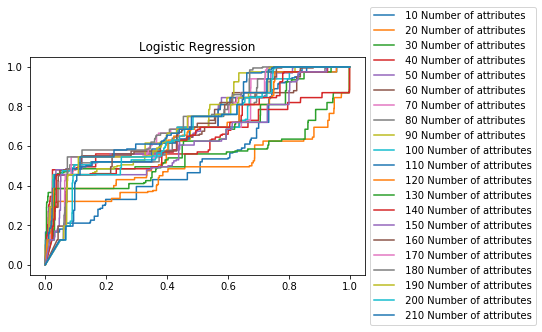

In [217]:
Auc_lr =[]
No_of_Attributes_lr =[]

for n in range(10, 220, 10):
    cols_sel_mic = mic_df.sort_values('mic', ascending = False)['att'][:i][:n]
    lr.fit(train_sel_rf[cols_sel_mic], train_sel_rf['class'])
    probs_lr=lr.predict_proba(dt_test_imp[cols_sel_mic])
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(dt_test_imp['class'],probs_lr[:,1])
    auc_lr=auc(fpr_lr,tpr_lr)
    Auc_lr.append(auc_lr)
    No_of_Attributes_lr.append(n)
    plt.title('Logistic Regression')
    plt.plot(fpr_lr, tpr_lr, label =" {} Number of attributes".format(n))
    plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))

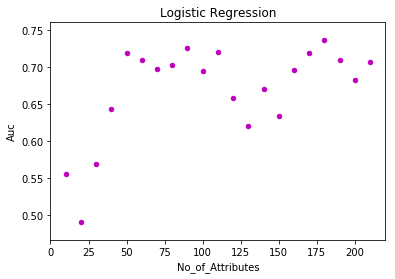

In [218]:
aucperf_lr= pd.DataFrame({'No_of_Attributes':No_of_Attributes_lr,'Auc':Auc_lr})
aucperf_lr.plot.scatter(x='No_of_Attributes',y='Auc',c='m',title = 'Logistic Regression')

#### Tuning Logistic Regression

In [226]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)

grid_result = grid.fit(dt_tr_imp[cls], dt_tr_imp['class'])

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 76.9min finished


Best Score:  0.7381438053790037
Best Params:  {'C': 0.0001, 'class_weight': {1: 0.4, 0: 0.6}, 'penalty': 'l1', 'solver': 'saga'}


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

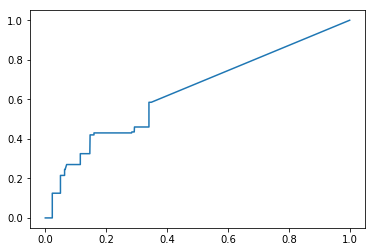

In [146]:
rf.fit(train_sel_rf[cls], train_sel_rf['class'])
probs_rf=rf.predict_proba(dt_test_imp[cls])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(dt_test_imp['class'],probs_rf[:,1])
auc_rf=auc(fpr_rf,tpr_rf)
plt.plot(fpr_rf, tpr_rf)

In [148]:
roc_auc_score(dt_test_imp['class'], probs_rf[:,1])

0.6361336883408072

#### Random Forest WRT to features

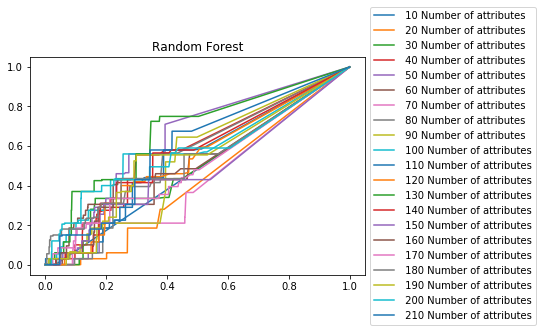

In [142]:
'''
l_sel_rf = []
a_sel_rf = []
r_sel_rf = []
tr_sz_sel_rf = []

for i in range (10, 60, 10):
    
    
    
    mic_sel = mic_df.sort_values('mic', ascending = False)['att'][:i].tolist()
    #print (mic_sel)
    le_sel_rf = len(mic_sel)
    l_sel_rf.append(le_sel_rf)
    
    for s in range (10, 50, 10):
        
        #train_sel_rf = tr[: int(sz * s/100)]
        #print (train_sel_rf)
        rf.fit(train_sel_rf[mic_sel], train_sel_rf['class'])
        probs_sel_rf = rf.predict(dt_test_imp[mic_sel])
        fpr_sel_rf, tpr_sel_rf, threshold_sel_rf = roc_curve(dt_test_imp['class'], probs_lr[:,1])
        a_sel_rf = auc(fpr_sel_rf, tpr_sel_rf)
        r_sel_rf.append(a_sel_rf)
        tr_sz_sel_rf.append(i)
        
    plt.title("Random Forest")
    plt.plot (tr_sz_sel_rf, r_sel_rf, label = "with {} features". format(le_sel_rf))
    plt.legend()
    plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))
    
'''
Auc =[]
No_of_Attributes =[]
for n in range(10, 220, 10):
    cols_sel_mic = mic_df.sort_values('mic', ascending = False)['att'][:i][:n]
    rf.fit(train_sel_rf[cols_sel_mic], train_sel_rf['class'])
    probs_rf=rf.predict_proba(dt_test_imp[cols_sel_mic])
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(dt_test_imp['class'],probs_rf[:,1])
    auc_rf=auc(fpr_rf,tpr_rf)
    Auc.append(auc_rf)
    No_of_Attributes.append(n)
    plt.title('Random Forest')
    plt.plot(fpr_rf, tpr_rf, label =" {} Number of attributes".format(n))
    plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))

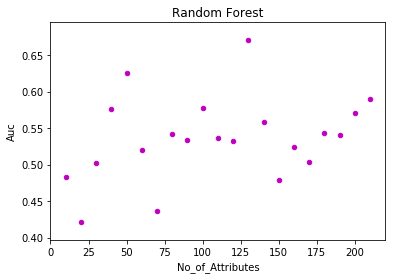

In [143]:
aucperf= pd.DataFrame({'No_of_Attributes':No_of_Attributes,'Auc':Auc})
aucperf.plot.scatter(x='No_of_Attributes',y='Auc',c='m',title = 'Random Forest')

#### Tuning Random Forest

In [177]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500]
max_depth = [5, 10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, n_jobs = -1)

bestF = gridF.fit(train_sel_rf[cols_sel_mic], train_sel_rf['class'])

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.3min finished


In [206]:
bestF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

0.5572245889387145

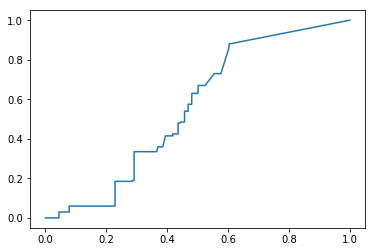

In [213]:
forestOpt = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)


forestOpt.fit(train_sel_rf[cls], train_sel_rf['class'])
probs_rf_opt = forestOpt.predict_proba(dt_test_imp[cls])
fpr_rf_opt, tpr_rf_opt, thresholds_rf_opt = roc_curve(dt_test_imp['class'],probs_rf_opt[:,1])
auc_rf_opt = auc(fpr_rf_opt, tpr_rf_opt)
plt.plot(fpr_rf_opt, tpr_rf_opt)
auc(fpr_rf_opt, tpr_rf_opt)

#### KNN

In [289]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Tuning Parameters

In [305]:
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters, cv = 3)
be_fit = model.fit(dt_tr_imp[cls], dt_tr_imp['class'])

#predictions on test data
#prediction=model.predict(test_X)

In [306]:
be_fit.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6}

In [307]:
knn_b = KNeighborsClassifier(leaf_size = 1, n_jobs = -1, n_neighbors = 6)

In [308]:
print('Best Score: ', be_fit.best_score_)

Best Score:  0.970896807670503


#### Simple KNN

0.5617526158445442

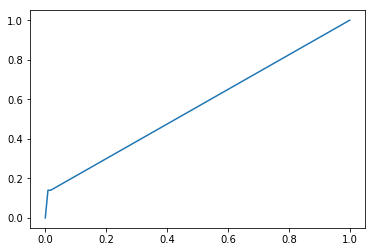

In [296]:
mod = knn_b.fit(dt_tr_imp[cls], dt_tr_imp['class'])
probs_knn_opt = mod.predict_proba(dt_test_imp[cls])
fpr_knn_opt, tpr_knn_opt, thresholds_knn_opt = roc_curve(dt_test_imp['class'],probs_knn_opt[:,1])
auc_knn_opt = auc(fpr_knn_opt, tpr_knn_opt)
plt.plot(fpr_knn_opt, tpr_knn_opt)
auc(fpr_knn_opt, tpr_knn_opt)

#### KNN wrt Features

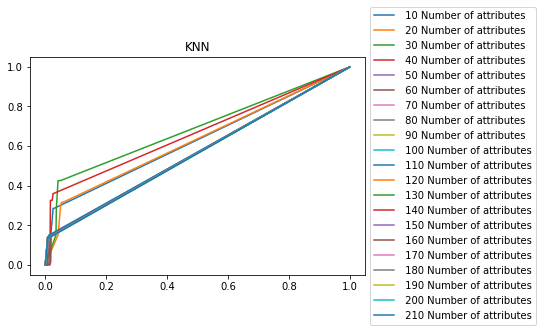

In [302]:
knn = KNeighborsClassifier()

Auc_knn =[]
No_of_Attributes_knn =[]

for n in range(10, 220, 10):
    cols_sel_mic = mic_df.sort_values('mic', ascending = False)['att'][:i][:n]
    knn.fit(dt_tr_imp[cols_sel_mic],dt_tr_imp['class'])
    probs_knn=knn.predict_proba(dt_test_imp[cols_sel_mic])
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(dt_test_imp['class'],probs_knn[:,1])
    auc_knn=auc(fpr_knn,tpr_knn)
    Auc_knn.append(auc_knn)
    No_of_Attributes_knn.append(n)
    plt.title('KNN')
    plt.plot(fpr_knn, tpr_knn, label =" {} Number of attributes".format(n))
    plt.legend(loc = 6, bbox_to_anchor = (1, 0.5))

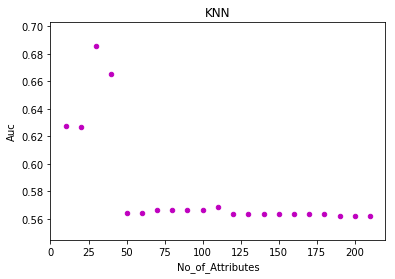

In [303]:
aucperf= pd.DataFrame({'No_of_Attributes':No_of_Attributes_knn,'Auc':Auc_knn})
aucperf.plot.scatter(x='No_of_Attributes',y='Auc',c='m',title = 'KNN')